In [72]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [73]:
def combine_waves(color_log_folders, color, channels, wave_type):
    data = {channel: [] for channel in channels}
    for folder in color_log_folders:
        for channel in channels:
            filepath = f"{folder}\\signal_{color}\\waves\\{channel}\\{wave_type}\\percent.csv"
            df_temp = pd.read_csv(filepath)
            # Append the 'value' column data from each file
            data[channel].append(df_temp['value'])
    return pd.DataFrame({f"{channel}_{wave_type}": pd.concat(readings, ignore_index=True) for channel, readings in data.items()})

def create_color_dataframes(colors, wave_types, channels, logs):
    """
    Creates a dictionary of dataframes for each color, where each dataframe is 
    the concatenation (along axis=1) of the waves for a given color.
    """
    color_dfs = {}
    for color in colors:
        # For each color, get the dataframe for each wave type (alpha, beta, theta)
        wave_dfs = [combine_waves(logs, color, channels, wave)
                    for wave in wave_types]
        # Concatenate the wave dataframes horizontally.
        color_dfs[color] = pd.concat(wave_dfs, axis=1)
    return color_dfs

In [ ]:
colors = ["blue", "green", "red"]
wave_types = ["alpha", "beta", "theta"]
channels = ["O1", "O2", "T3", "T4"]
logs = ["color_logs_RGB_1"]  # ['color_logs_1', 'color_logs_2', ..., 'color_logs_5']

train_color_dfs = create_color_dataframes(colors, wave_types, channels, logs)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [77]:
# display boxplots for all channels
import matplotlib.pyplot as plt
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create boxplots for all channels
data = [train_color_dfs["green"]['O1_alpha'], train_color_dfs["green"]['O2_alpha'], train_color_dfs["green"]['T3_alpha'], train_color_dfs["green"]['T4_alpha'],
        train_color_dfs["red"]['O1_alpha'], train_color_dfs["red"]['O2_alpha'], train_color_dfs["red"]['T3_alpha'], train_color_dfs["red"]['T4_alpha'],
        train_color_dfs["blue"]['O1_alpha'], train_color_dfs["blue"]['O2_alpha'], train_color_dfs["blue"]['T3_alpha'], train_color_dfs["blue"]['T4_alpha']]
plt.boxplot(data, labels=['Green O1', 'Green O2', 'Green T3', 'Green T4', 'Red O1', 'Red O2', 'Red T3', 'Red T4', 'Blue O1', 'Blue O2', 'Blue T3', 'Blue T4'])

# Customize the plot
plt.title('EEG alpha waves by Channel')
plt.ylabel('Signal Value')

# Display the plot
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1000x600 with 0 Axes>

C:\Users\er321\AppData\Local\Temp\ipykernel_16848\2729196000.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Blue O1', 'Blue O2', 'Red O1', 'Red O2', 'Red O1', 'Red O2'])


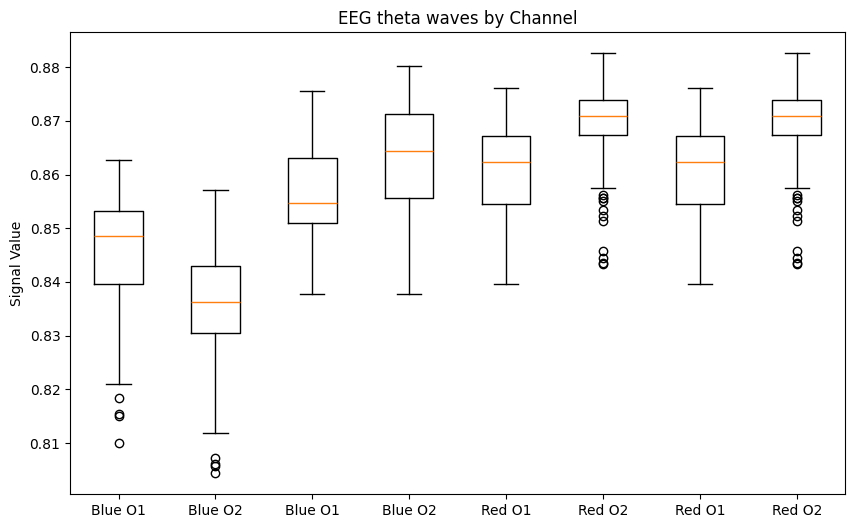

In [36]:
# display boxplots for all channels
import matplotlib.pyplot as plt
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create boxplots for all channels
data = [blue_theta_8['O1_theta'], blue_theta_8['O2_theta'],
        blue_theta_9['O1_theta'], blue_theta_9['O2_theta'],
        red_theta_8['O1_theta'], red_theta_8['O2_theta'],
        red_theta_9['O1_theta'], red_theta_9['O2_theta']]
plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Blue O1', 'Blue O2', 'Red O1', 'Red O2', 'Red O1', 'Red O2'])

# Customize the plot
plt.title('EEG theta waves by Channel')
plt.ylabel('Signal Value')

# Display the plot
plt.show()

In [ ]:
green_alpha_1 = combine_waves(["color_logs_1"], "green", ["O1", "O2", ], "alpha")
green_alpha_2 = combine_waves(["color_logs_2"], "green", ["O1", "O2"], "alpha")
green_alpha_3 = combine_waves(["color_logs_3"], "green", ["O1", "O2"], "alpha")
green_alpha_4 = combine_waves(["color_logs_4"], "green", ["O1", "O2"], "alpha")
green_alpha_5 = combine_waves(["color_logs_5"], "green", ["O1", "O2"], "alpha")
green_alpha_6 = combine_waves(["color_logs_6"], "green", ["O1", "O2"], "alpha")

green_beta_1 = combine_waves(["color_logs_1"], "green", ["O1", "O2"], "beta")
green_beta_2 = combine_waves(["color_logs_2"], "green", ["O1", "O2"], "beta")
green_beta_3 = combine_waves(["color_logs_3"], "green", ["O1", "O2"], "beta")
green_beta_4 = combine_waves(["color_logs_4"], "green", ["O1", "O2"], "beta")
green_beta_5 = combine_waves(["color_logs_5"], "green", ["O1", "O2"], "beta")

green_theta_1 = combine_waves(["color_logs_1"], "green", ["O1", "O2"], "theta")
green_theta_2 = combine_waves(["color_logs_2"], "green", ["O1", "O2"], "theta")
green_theta_3 = combine_waves(["color_logs_3"], "green", ["O1", "O2"], "theta")
green_theta_4 = combine_waves(["color_logs_4"], "green", ["O1", "O2"], "theta")
green_theta_5 = combine_waves(["color_logs_5"], "green", ["O1", "O2"], "theta")



green_alpha_df = pd.concat([green_alpha_1, green_alpha_2, green_alpha_3, green_alpha_4, green_alpha_5])
green_beta_df = pd.concat([green_beta_1, green_beta_2, green_beta_3, green_beta_4, green_beta_5])
green_theta_df = pd.concat([green_theta_1, green_theta_2, green_theta_3, green_theta_4, green_theta_5])
green_df = pd.concat([green_alpha_df, green_beta_df, green_theta_df], axis=1)
print(green_df.head())

   O1_alpha  O2_alpha   O1_beta   O2_beta  O1_theta  O2_theta
0  0.083291  0.084447  0.032636  0.030215  0.884073  0.885339
1  0.085669  0.082777  0.032096  0.030895  0.882235  0.886328
2  0.087676  0.082478  0.032593  0.032346  0.879731  0.885176
3  0.085243  0.081821  0.032661  0.031346  0.882097  0.886833
4  0.088013  0.081877  0.032464  0.032198  0.879522  0.885925


In [38]:
red_alpha_1 = combine_waves(["color_logs_1"], "red", ["O1", "O2"], "alpha")
red_alpha_2 = combine_waves(["color_logs_2"], "red", ["O1", "O2"], "alpha")
red_alpha_3 = combine_waves(["color_logs_3"], "red", ["O1", "O2"], "alpha")
red_alpha_4 = combine_waves(["color_logs_4"], "red", ["O1", "O2"], "alpha")
red_alpha_5 = combine_waves(["color_logs_5"], "red", ["O1", "O2"], "alpha")
red_alpha_6 = combine_waves(["color_logs_6"], "red", ["O1", "O2"], "alpha")

red_beta_1 = combine_waves(["color_logs_1"], "red", ["O1", "O2"], "beta")
red_beta_2 = combine_waves(["color_logs_2"], "red", ["O1", "O2"], "beta")
red_beta_3 = combine_waves(["color_logs_3"], "red", ["O1", "O2"], "beta")
red_beta_4 = combine_waves(["color_logs_4"], "red", ["O1", "O2"], "beta")
red_beta_5 = combine_waves(["color_logs_5"], "red", ["O1", "O2"], "beta")

red_theta_1 = combine_waves(["color_logs_1"], "red", ["O1", "O2"], "theta")
red_theta_2 = combine_waves(["color_logs_2"], "red", ["O1", "O2"], "theta")
red_theta_3 = combine_waves(["color_logs_3"], "red", ["O1", "O2"], "theta")
red_theta_4 = combine_waves(["color_logs_4"], "red", ["O1", "O2"], "theta")
red_theta_5 = combine_waves(["color_logs_5"], "red", ["O1", "O2"], "theta")

red_alpha_df = pd.concat([red_alpha_1, red_alpha_2, red_alpha_3, red_alpha_4, red_alpha_5])
red_beta_df = pd.concat([red_beta_1, red_beta_2, red_beta_3, red_beta_4, red_beta_5])
red_theta_df = pd.concat([red_theta_1, red_theta_2, red_theta_3, red_theta_4, red_theta_5])
red_df = pd.concat([red_alpha_df, red_beta_df, red_theta_df], axis=1)
print(red_df.head())

   O1_alpha  O2_alpha   O1_beta   O2_beta  O1_theta  O2_theta
0  0.087243  0.089191  0.029382  0.024033  0.883375  0.886776
1  0.082708  0.087269  0.031360  0.026027  0.885933  0.886703
2  0.080461  0.085163  0.032741  0.026916  0.886798  0.887921
3  0.085708  0.087230  0.032614  0.026920  0.881677  0.885850
4  0.083225  0.086808  0.032129  0.027095  0.884645  0.886098


In [39]:
violet_alpha_1 = combine_waves(["color_logs_1"], "violet", ["O1", "O2"], "alpha")
violet_alpha_2 = combine_waves(["color_logs_2"], "violet", ["O1", "O2"], "alpha")
violet_alpha_3 = combine_waves(["color_logs_3"], "violet", ["O1", "O2"], "alpha")
violet_alpha_4 = combine_waves(["color_logs_4"], "violet", ["O1", "O2"], "alpha")
violet_alpha_5 = combine_waves(["color_logs_5"], "violet", ["O1", "O2"], "alpha")
violet_alpha_6 = combine_waves(["color_logs_6"], "violet", ["O1", "O2"], "alpha")

violet_beta_1 = combine_waves(["color_logs_1"], "violet", ["O1", "O2"], "beta")
violet_beta_2 = combine_waves(["color_logs_2"], "violet", ["O1", "O2"], "beta")
violet_beta_3 = combine_waves(["color_logs_3"], "violet", ["O1", "O2"], "beta")
violet_beta_4 = combine_waves(["color_logs_4"], "violet", ["O1", "O2"], "beta")
violet_beta_5 = combine_waves(["color_logs_5"], "violet", ["O1", "O2"], "beta")

violet_theta_1 = combine_waves(["color_logs_1"], "violet", ["O1", "O2"], "theta")
violet_theta_2 = combine_waves(["color_logs_2"], "violet", ["O1", "O2"], "theta")
violet_theta_3 = combine_waves(["color_logs_3"], "violet", ["O1", "O2"], "theta")
violet_theta_4 = combine_waves(["color_logs_4"], "violet", ["O1", "O2"], "theta")
violet_theta_5 = combine_waves(["color_logs_5"], "violet", ["O1", "O2"], "theta")

violet_alpha_df = pd.concat([violet_alpha_1, violet_alpha_2, violet_alpha_3, violet_alpha_4, violet_alpha_5])
violet_beta_df = pd.concat([violet_beta_1, violet_beta_2, violet_beta_3, violet_beta_4, violet_beta_5])
violet_theta_df = pd.concat([violet_theta_1, violet_theta_2, violet_theta_3, violet_theta_4, violet_theta_5])
violet_df = pd.concat([violet_alpha_df, violet_beta_df, violet_theta_df], axis=1)
print(violet_df.head())

   O1_alpha  O2_alpha   O1_beta   O2_beta  O1_theta  O2_theta
0  0.085472  0.086900  0.030058  0.024092  0.884470  0.889008
1  0.084801  0.085030  0.029684  0.024078  0.885515  0.890893
2  0.084510  0.086477  0.029069  0.024102  0.886421  0.889420
3  0.086438  0.086318  0.028437  0.024691  0.885125  0.888991
4  0.085464  0.084693  0.027694  0.024583  0.886842  0.890724


C:\Users\er321\AppData\Local\Temp\ipykernel_16848\4275471948.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(file_data, labels=['Green O1', 'Green O2', 'Red O1', 'Red O2', 'Violet O1', 'Violet O2'])
C:\Users\er321\AppData\Local\Temp\ipykernel_16848\4275471948.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(file_data, labels=['Green O1', 'Green O2', 'Red O1', 'Red O2', 'Violet O1', 'Violet O2'])
C:\Users\er321\AppData\Local\Temp\ipykernel_16848\4275471948.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(file_data, labels=['Green O1', 'Green O2', 'Red O1', 'Red O2', 'Violet

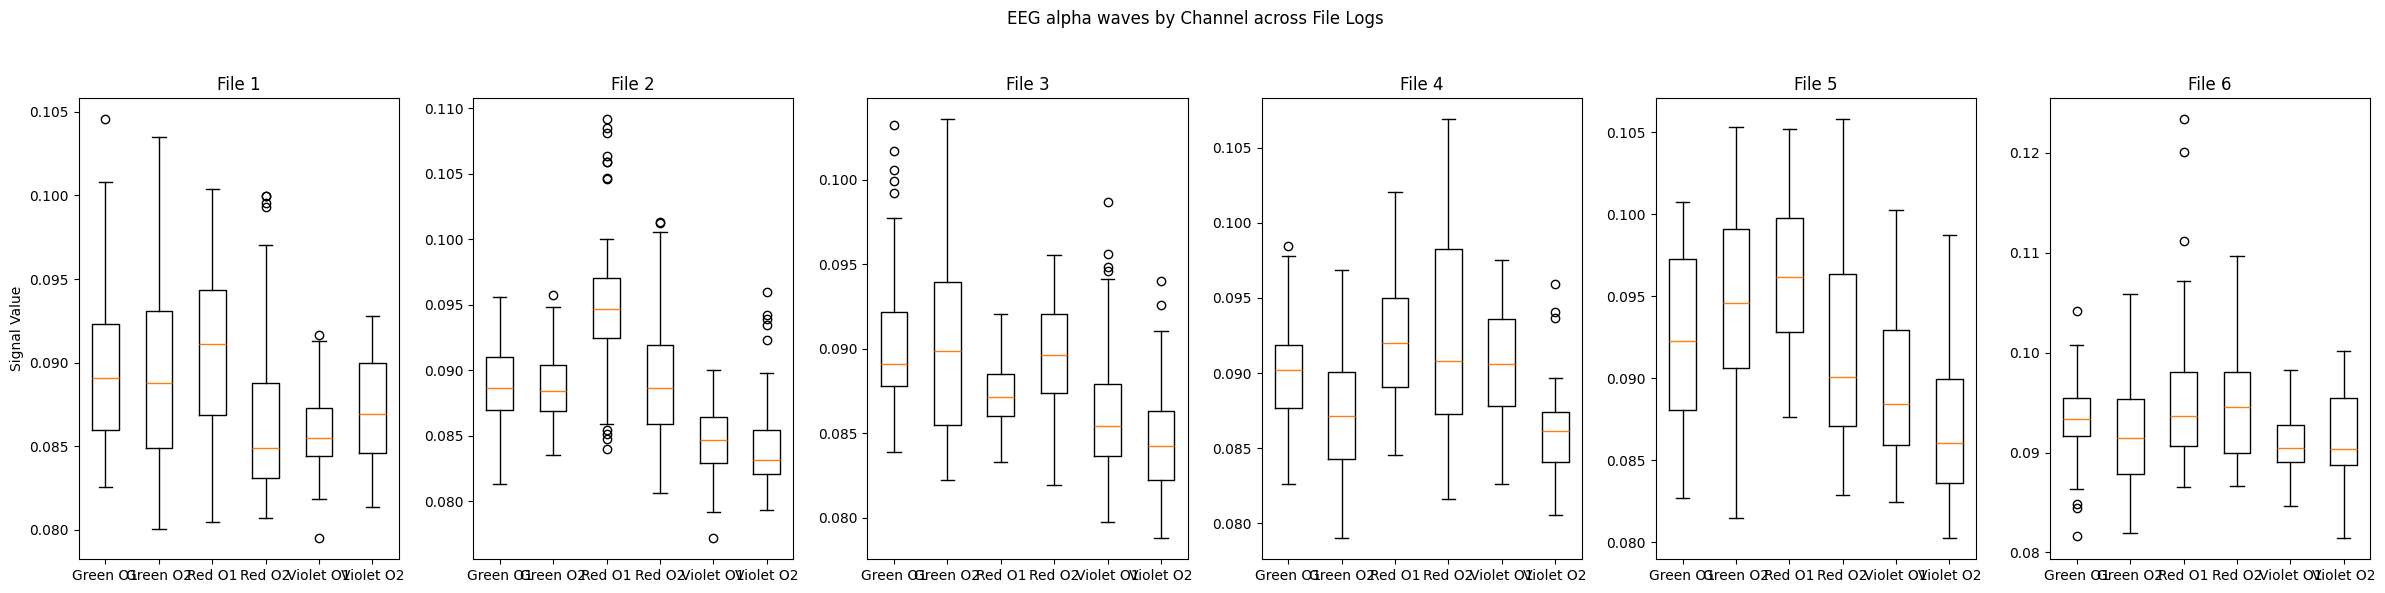

In [40]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 6, figsize=(24, 6))

for i, ax in enumerate(axs, start=1):
    # Retrieve the boxplot data for the current file number from each color
    green_data = eval(f'green_alpha_{i}')
    red_data = eval(f'red_alpha_{i}')
    violet_data = eval(f'violet_alpha_{i}')
    
    # Gather the two channels for each color
    file_data = [green_data['O1_alpha'], green_data['O2_alpha'],
                 red_data['O1_alpha'], red_data['O2_alpha'],
                 violet_data['O1_alpha'], violet_data['O2_alpha']]
    
    # Create the boxplot for this file log
    ax.boxplot(file_data, labels=['Green O1', 'Green O2', 'Red O1', 'Red O2', 'Violet O1', 'Violet O2'])
    ax.set_title(f'File {i}')
    if i == 1:
        ax.set_ylabel('Signal Value')

plt.suptitle('EEG alpha waves by Channel across File Logs')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [41]:
# # display boxplots for all channels
# import matplotlib.pyplot as plt
# # Create a figure and axis
# plt.figure(figsize=(10, 6))

# # Create boxplots for all channels
# data = [green_alpha['O1'], green_alpha['O2'],
#         green_beta['O1'], green_beta['O2'],
#         red_alpha['O1'], red_alpha['O2'], 
#         red_beta['O1'], red_beta['O2'],
#         violet_alpha['O1'], violet_alpha['O2'],
#         violet_beta['O1'], violet_beta['O2']]
# plt.boxplot(data, labels=['Green O1', 'Green O2', 'Green Beta O1', 'Green Beta O2', 'Red O1', 'Red O2', 'Red Beta O1', 'Red Beta O2', 'Violet O1', 'Violet O2', 'Violet Beta O1', 'Violet Beta O2'])

# # Customize the plot
# plt.title('EEG alpha waves by Channel')
# plt.ylabel('Signal Value')

# # Display the plot
# plt.show()

In [42]:
# # calculate the standard deviation of the alpha waves
# print("Green Alpha std (O1, O2):", green_alpha[['O1', 'O2']].std())
# print("Red Alpha std (O1, O2):", red_alpha[['O1', 'O2']].std())
# print("Violet Alpha std (O1, O2):", violet_alpha[['O1', 'O2']].std())

In [43]:
green_df["label"] = "green"
red_df["label"] = "red"
violet_df["label"] = "violet"

waves = pd.concat([green_df, red_df, violet_df])

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(waves[['O1_alpha', 'O2_alpha', 'O1_beta', 'O2_beta', 'O1_theta', 'O2_theta']], waves['label'], test_size=0.3, stratify=waves['label'])

In [45]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       green       0.58      0.39      0.46        75
         red       0.47      0.49      0.48        75
      violet       0.51      0.65      0.57        75

    accuracy                           0.51       225
   macro avg       0.52      0.51      0.51       225
weighted avg       0.52      0.51      0.51       225

0.5111111111111111
